In [3]:
import numpy as np
import pandas as pd
# import statsmodels.api as sm
import matplotlib.pyplot as plt 
%matplotlib inline
import random as rand
from os import listdir
import matplotlib.dates as mdates
# from sklearn.preprocessing import PolynomialFeatures

In [106]:
data_folder = "../datasets/"
filenames = listdir(data_folder)
# clean filenames
filenames = [i for i in filenames if i[-4:] == ".csv"]
filenames.remove("twitter_data.csv")

data = pd.DataFrame()
data["Date"] = pd.read_csv(data_folder + filenames[0])["Date"]


for file in filenames:
    data[file[:-9] + "_close"] = pd.read_csv(data_folder + file)['Close']
    data[file[:-9] + "_open"] = pd.read_csv(data_folder + file)['Open']

print(data.shape)
    
is_up = []
# for i in range(data.shape[0]):
#     if i == 0:
#         is_up.append(False)
#         continue
#     if data["TSLA_close"].iloc[i-1] > data["TSLA_close"].iloc[i-1]:
#         is_up.append(False)
#     else:
#         is_up.append(True)

for i in range(data.shape[0]):
    if data["TSLA_open"].iloc[i] > data["TSLA_close"].iloc[i-1]:
        is_up.append(False)
    else:
        is_up.append(True)

data["Tesla_appreciated"] = is_up
    

data.head()

(693, 9)


Date  F_close  F_open   GM_close    GM_open  TSLA_close  TSLA_open  \
0  2019-01-02     7.90    7.53  33.639999  32.849998   62.023998  61.220001   
1  2019-01-03     7.78    7.97  32.250000  33.340000   60.071999  61.400002   
2  2019-01-04     8.08    7.91  33.330002  32.799999   63.537998  61.200001   
3  2019-01-07     8.29    8.11  34.360001  33.709999   66.991997  64.344002   
4  2019-01-08     8.37    8.42  34.810001  35.000000   67.070000  68.391998   

   VWAGY_close  VWAGY_open  Tesla_appreciated  
0    15.478000   15.315000               True  
1    15.450000   15.410000               True  
2    16.020000   15.760000              False  
3    16.242001   16.264999              False  
4    16.444000   16.610001              False

In [6]:
# Get a list of stock ticker names
ticker_names = [i[:-9] for i in filenames]
ticker_names

['F', 'GM', 'TSLA', 'VWAGY']

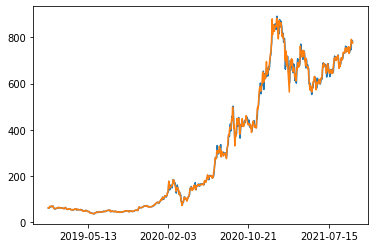

In [7]:
# visualize tesla open/close
fig, axes = plt.subplots()
axes.plot(data["Date"], data["TSLA_open"])
axes.plot(data["Date"], data["TSLA_close"])
fmt_half_year = mdates.MonthLocator(interval=6)
axes.xaxis.set_major_locator(fmt_half_year)

plt.show()

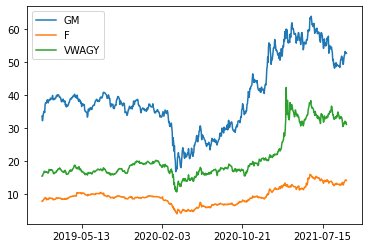

In [8]:
# visualize trend on all close prices
fig, axes = plt.subplots()

# axes.plot(data["Date"], data["TSLA_close"])
axes.plot(data["Date"], data["GM_close"], label="GM")
axes.plot(data["Date"], data["F_close"], label="F")
axes.plot(data["Date"], data["VWAGY_close"], label="VWAGY")
fmt_half_year = mdates.MonthLocator(interval=6)
axes.xaxis.set_major_locator(fmt_half_year)
axes.legend()

plt.show()

In [9]:
# format data into X and Y
# turn time series into indipendent data entries
# vertically shift tesla's closing price
data["TSLA_tmr_close"] = data["TSLA_close"].shift(-1, fill_value=-1)
data = data.drop(data.shape[0]-1)

# add "price difference columns"
for ticker in ticker_names:
    data[ticker + "_difference"] = data[ticker+"_close"] - data[ticker+"_open"]
    
data.head()

Date  F_close  F_open   GM_close    GM_open  TSLA_close  TSLA_open  \
0  2019-01-02     7.90    7.53  33.639999  32.849998   62.023998  61.220001   
1  2019-01-03     7.78    7.97  32.250000  33.340000   60.071999  61.400002   
2  2019-01-04     8.08    7.91  33.330002  32.799999   63.537998  61.200001   
3  2019-01-07     8.29    8.11  34.360001  33.709999   66.991997  64.344002   
4  2019-01-08     8.37    8.42  34.810001  35.000000   67.070000  68.391998   

   VWAGY_close  VWAGY_open  TSLA_tmr_close  F_difference  GM_difference  \
0    15.478000   15.315000       60.071999          0.37       0.790001   
1    15.450000   15.410000       63.537998         -0.19      -1.090000   
2    16.020000   15.760000       66.991997          0.17       0.530003   
3    16.242001   16.264999       67.070000          0.18       0.650002   
4    16.444000   16.610001       67.706001         -0.05      -0.189999   

   TSLA_difference  VWAGY_difference  
0         0.803997          0.163000  
1        -1.328003          0.040000  
2         2.337997          0.260000  
3         2.647995         -0.022999  
4        -1.321999         -0.166000

# Including Tesla's opening/closing price of the current day

In [74]:
# linear model function
# This function just computes the mean squared error
def MSE(y, pred):
    # YOUR CODE HERE 
    err = y - pred
    squared_err = err ** 2
    
    return np.mean(squared_err)
    
# This function plots the main diagonal;for a "predicted vs true" plot with perfect predictions, all data lies on this line
def plotDiagonal(xmin, xmax):
    xsamples = np.arange(xmin,xmax,step=0.01)
    plt.plot(xsamples,xsamples,c='black')

# This helper function plots x vs y and labels the axes
def plotdata(x=None,y=None,xname=None,yname=None,margin=0.05,plotDiag=True,zeromin=False):
    plt.scatter(x,y,label='data')
    plt.xlabel(xname)
    plt.ylabel(yname)
    range_x = max(x) - min(x)
    range_y = max(y) - min(y)
    if plotDiag:
        plotDiagonal(min(x)-margin*range_x,max(x)+margin*range_x)
    if zeromin:
        plt.xlim(0.0,max(x)+margin*range_x)
        plt.ylim(0.0,max(y)+margin*range_y)
    else:
        plt.xlim(min(x)-margin*range_x,max(x)+margin*range_x)
        plt.ylim(min(y)-margin*range_y,max(y)+margin*range_y)
    plt.show()

# This function plots the predicted labels vs the actual labels (We only plot the first 1000 points to avoid slow plots)
def plot_pred_true(test_pred=None, test_y=None, max_points = 1000):
    plotdata(test_pred[1:max_points], test_y[1:max_points],'Predicted', 'True', zeromin=True)

# This function runs OLS and bypasses any SVD (Singular Value Decomposition) convergence errors by refitting the model
def run_OLS(train_y, test_y, train_vals, test_vals):
    ols_model = sm.regression.linear_model.OLS(train_y, train_vals)
    while True: # Bypasses SVD convergence assertion error
        try:
            results = ols_model.fit()
            break
        except:
            None
            
    w = np.array(results.params).reshape([len(results.params),1])

    train_pred = np.matmul(train_vals,w)
    test_pred = np.matmul(test_vals,w)

    train_MSE = MSE(train_y, train_pred.flatten())
    test_MSE = MSE(test_y, test_pred.flatten())
    
    return train_MSE, test_MSE, test_pred

In [91]:
# columns for X
input_columns = [
    "F_close",
    "F_open",
    "GM_close",
    "GM_open",
    "VWAGY_close",
    "VWAGY_open",
    "F_difference",
    "GM_difference",
    "VWAGY_difference",
    "TSLA_close",
    "TSLA_open",
    "TSLA_difference"
]
# Test and train split
train_ratio = 0.8
# shuffle and split data
data_shuffled = data.sample(frac = 1)
n = len(data)
t = int(train_ratio * n)

target = data_shuffled['TSLA_tmr_close']
X_columns = data_shuffled.loc[:, data_shuffled.columns.isin(input_columns)]
print(X_columns.columns)

train_x = X_columns.iloc[:t]
test_x = X_columns.iloc[t:]

train_y = target[:t]
test_y = target[t:]

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

Index(['F_close', 'F_open', 'GM_close', 'GM_open', 'TSLA_close', 'TSLA_open',
       'VWAGY_close', 'VWAGY_open', 'F_difference', 'GM_difference',
       'TSLA_difference', 'VWAGY_difference'],
      dtype='object')
(552, 12) (138, 12) (552,) (138,)


Train MSE	 239.358837787285
Test MSE	 219.05811509678844


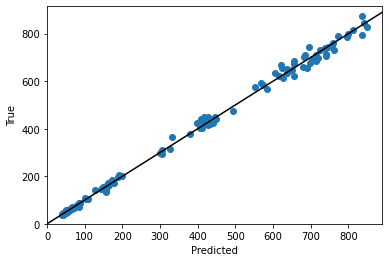

In [94]:
# train and print result
train_val = np.array(train_x)
test_val = np.array(test_x)

train_MSE, test_MSE, test_pred = run_OLS(np.array(train_y), np.array(test_y), train_val, test_val)

print("Train MSE\t", str(train_MSE))
print("Test MSE\t", str(test_MSE))

plot_pred_true(test_pred.flatten(), test_y) #.flatten() will make sure the dimensions match

# Without information on the stock itself, how good will the prediction be?


In [95]:
# columns for X
input_columns = [
    "F_close",
    "F_open",
    "GM_close",
    "GM_open",
    "VWAGY_close",
    "VWAGY_open",
    "F_difference",
    "GM_difference",
    "VWAGY_difference",
]
# Test and train split
train_ratio = 0.8
# shuffle and split data
data_shuffled = data.sample(frac = 1)
n = len(data)
t = int(train_ratio * n)

target = data_shuffled['TSLA_tmr_close']
X_columns = data_shuffled.loc[:, data_shuffled.columns.isin(input_columns)]
print(X_columns.columns)

train_x = X_columns.iloc[:t]
test_x = X_columns.iloc[t:]

train_y = target[:t]
test_y = target[t:]

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

Index(['F_close', 'F_open', 'GM_close', 'GM_open', 'VWAGY_close', 'VWAGY_open',
       'F_difference', 'GM_difference', 'VWAGY_difference'],
      dtype='object')
(552, 9) (138, 9) (552,) (138,)


Train MSE	 31298.421189283425
Test MSE	 35181.35330532029


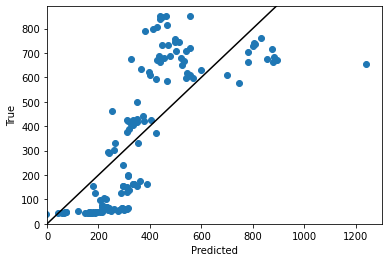

In [96]:
# train and print result
train_val = np.array(train_x)
test_val = np.array(test_x)

train_MSE, test_MSE, test_pred = run_OLS(np.array(train_y), np.array(test_y), train_val, test_val)

print("Train MSE\t", str(train_MSE))
print("Test MSE\t", str(test_MSE))

plot_pred_true(test_pred.flatten(), test_y) #.flatten() will make sure the dimensions match

# Can we do better with some more external information?
## Ideas:
#### 1) Add polynomial transformation of the other stock prices
#### 2) Add new data: Musk's twitter data
#### 3) Add new data: Tesla related news
#### 4) Add new data: Ranking on Reddit
#### 5) Use a different learning model

## 1) Add polynomials transformation of the other stock prices

### 1.1) Test the performance of the poly transformation of degree 2

In [105]:
# add polynomials to the train and test X arraies
print(train_x.shape)
poly = PolynomialFeatures(2)
ploy_train_x = poly.fit_transform(train_x)
ploy_test_x = poly.fit_transform(test_x)
print(ploy_x.shape)

(552, 9)
(552, 55)


Train MSE	 12360.499345311233
Test MSE	 15506.776826634517


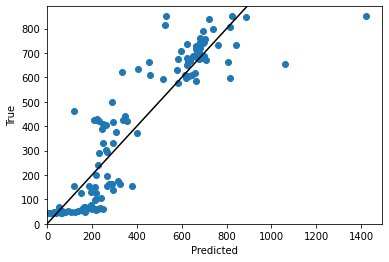

In [106]:
# train and print result
train_val = np.array(ploy_train_x)
test_val = np.array(ploy_test_x)

train_MSE, test_MSE, test_pred = run_OLS(np.array(train_y), np.array(test_y), train_val, test_val)

print("Train MSE\t", str(train_MSE))
print("Test MSE\t", str(test_MSE))

plot_pred_true(test_pred.flatten(), test_y) 

### 1.2) Compare the performance of the poly transformations of degree 1-3


In [121]:
test_range = range(1,4)
train_errors = []
test_errors = []

for i in test_range:
    poly = PolynomialFeatures(i)
    ploy_train_x = poly.fit_transform(train_x)
    ploy_test_x = poly.fit_transform(test_x)
    
    train_val = np.array(ploy_train_x)
    test_val = np.array(ploy_test_x)

    train_MSE, test_MSE, test_pred = run_OLS(np.array(train_y), np.array(test_y), train_val, test_val)
    train_errors.append(train_MSE)
    test_errors.append(test_MSE)
#     plot_pred_true(test_pred.flatten(), test_y) 

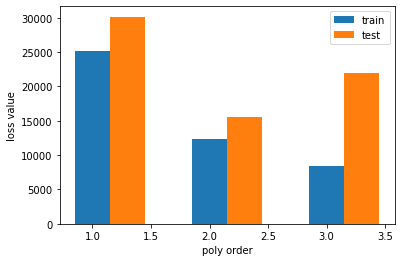

In [123]:
# plot a bar chart to compare the loss values
width = 0.3 
x = np.array(list(test_range))
plt.bar(x, train_errors, width, label="train")
plt.bar(x+width, test_errors, width, label="test")
plt.xlabel("poly order")
plt.ylabel("loss value")
plt.legend()
plt.show()

In [ ]:
# plot the prediction graphs


#### we can see that ploy(2) produces the best result and the model starts to overfit at poly(3)

## 2) Add new data: Musk's twitter data

In [81]:
import re
df = pd.read_csv("../datasets/twitter_data.csv")
print(df.shape)
df.head

(3247, 3)


<bound method NDFrame.head of       Unnamed: 0            Date  \
0              0  [2021, 10, 29]   
1              1  [2021, 10, 29]   
2              2  [2021, 10, 29]   
3              3  [2021, 10, 29]   
4              4  [2021, 10, 29]   
...          ...             ...   
3242        3242  [2020, 10, 13]   
3243        3243  [2020, 10, 13]   
3244        3244  [2020, 10, 13]   
3245        3245  [2020, 10, 13]   
3246        3246  [2020, 10, 13]   

                                                Content  
0     @ray4tesla My new album:\n\nLove Hertz\nBaby d...  
1                    @KingManninen Nope, T is def first  
2                       @ray4tesla “Tesla Hertz Shorts”  
3     RT @SpaceX: Falcon 9 and Dragon are looking go...  
4                                   Universally admired  
...                                                 ...  
3242  @PlayOverwatch @twomad Please buff Torb’s turret!  
3243                                   @twomad Um … yes  
3244  @teslaown

In [82]:
# clean the tweets with re, remove formatting, @, image url, etc.
n = df.shape[0]
lines = []
dates = []

for i in range(n):
    line = df["Content"].iloc[i]

    # remove @ portions
    line = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", line).split())
    df["Content"].iloc[i] = line

C:\Python\Python37\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [83]:
# combine multiple tweets from the same date
dates = []
tweets = []

prev_date = df["Date"].iloc[0]
string_holder = ""

for i in range(n):
    date = df["Date"].iloc[i]
    line = df["Content"].iloc[i]
    
    if date == prev_date:
        string_holder += " " + line
    
    else:
        dates.append(date)
        tweets.append(string_holder)
        
        string_holder = ""
        prev_date = date
        
print(len(dates), len(tweets))
dates = dates[27:]
tweets = tweets[27:]

365 365


In [84]:
# sentiment analysis
from textblob import TextBlob

n = len(dates)
sentiments = []

for i in range(n):
    tweet = tweets[i]
    analysis = TextBlob(tweet)
    # set sentiment
    sentiments.append(analysis.sentiment.polarity)

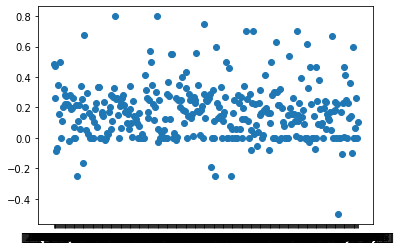

In [85]:
# plot sentiments
plt.scatter(dates, sentiments)
plt.xticks()
plt.show()


In [86]:
# date_range = [461, 150]
# print(data["Date"][date_range[0]:date_range[0]+4])

In [107]:
# plot with the information of stock going up or down
price_diff = data["TSLA_close"] - data["TSLA_open"]
is_bull = []
sentiments_list = []
date_list = []

df_truncated = data[461:-1]
print(df_truncated.shape)
print(df_truncated["Date"].iloc[-1], df_truncated["Date"].iloc[0])
j = 0

print("-------------------------------------------")
for i in range(df_truncated.shape[0]-1, -1, -1):
#     print(i)
    date = df_truncated["Date"].iloc[i]
    
    date_parts = date.split("-")
    date_parts = str([int(i) for i in date_parts])
#     print(f"stock: {date_parts}")
    
    is_bull.append(1 if data["Tesla_appreciated"].iloc[i] else 0)
    
    found = False
    while j < len(dates) and dates[j] >= date_parts:
        if dates[j] == date_parts:
            found = True
            break
        j += 1
#         print(dates[j])
#     print(found)
    if j == len(dates):
        break
    if found:
        sentiments_list.append(sentiments[j])
    else:
        sentiments_list.append(0)
    date_list.append(date)

print(len(is_bull), len(sentiments_list), len(date_list))

(231, 10)
2021-09-29 2020-10-29
-------------------------------------------
231 231 231


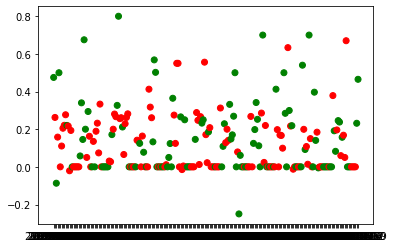

In [109]:
colormap = np.array(['r', 'g'])

plt.scatter(date_list, sentiments_list, color=colormap[is_bull])
plt.xticks()
plt.show()

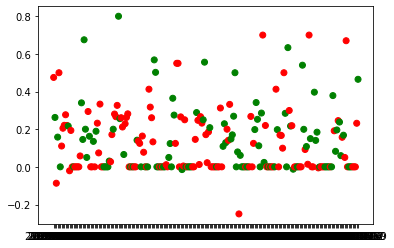

In [111]:
# what if the effect has a one-day delay
delayed_bull = [0] + [is_bull[i] for i in range(len(is_bull)) if i != len(is_bull)-1]

plt.scatter(date_list, sentiments_list, color=colormap[delayed_bull])
plt.xticks()
plt.show()

In [ ]:
# train a model 